<a href="https://colab.research.google.com/github/Mahnazshamissa/Python/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
!pip install statsmodel

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [3]:
data = sm.datasets.get_rdataset("dietox", "geepack").data

In [4]:
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


# **Linear Mixed Model**

In [5]:
df_X = data[['Weight','Time','Pig']]

In [6]:
md = smf.mixedlm("Weight ~ Time", df_X, groups=data["Pig"])

In [7]:
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Likelihood:         -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            



In [8]:
df_X

,Weight,Time,Pig
0,26.50000,1,4601
1,27.59999,2,4601
2,36.50000,3,4601
3,40.29999,4,4601
4,49.09998,5,4601
...,...,...,...
856,73.19995,8,8442
857,81.69995,9,8442
858,90.29999,10,8442
859,96.00000,11,8442


In [9]:
predic = mdf.predict(df_X)

In [10]:
mean_squared_error(predic, df_X['Weight'])

51.26223595860066

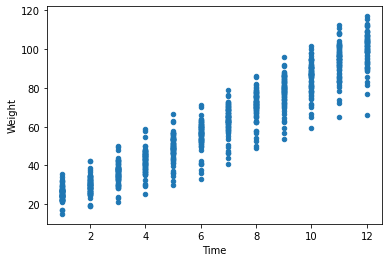

In [24]:
df_X.plot.scatter('Time','Weight');

# **OLS**

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
X = data[['Time','Pig']]
y = data['Weight']

In [12]:
clf = LinearRegression().fit(X,y)
ols_predict = clf.predict(X)

In [13]:
mean_squared_error(ols_predict, y)

51.25143564415134

# **Ridge Regression**

In [14]:
clf = Ridge(alpha=10000).fit(X,y)

In [15]:
ridge_predict = clf.predict(X)

In [16]:
mean_squared_error(ridge_predict, y)

191.35861348505773

# **Lasso**

In [17]:
clf = Lasso(alpha=0.001).fit(X,y)

In [18]:
lasso_predict = clf.predict(X)

In [19]:
mean_squared_error(lasso_predict, y)

51.251435728526545

# **Elastic**

In [20]:
regr = ElasticNet(random_state=0, alpha=0.00001, l1_ratio=1).fit(X,y)

In [21]:
elastic_predict = regr.predict(X)

In [22]:
mean_squared_error(elastic_predict, y)

51.2514356441598